# <b> Exploratory Data Analysis - Retail<b>
    
- What all business problems you can derive by exploring the data?

- Data can be found here: https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns4
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Load the data
data = pd.read_csv('SampleSuperstore.csv')
data.head(20)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


<b> Visualizing the data <b>

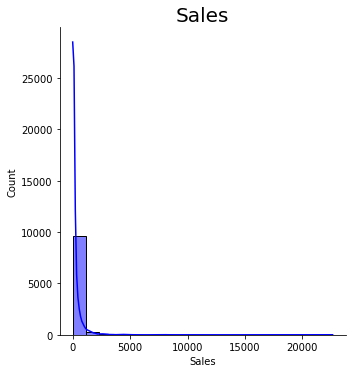

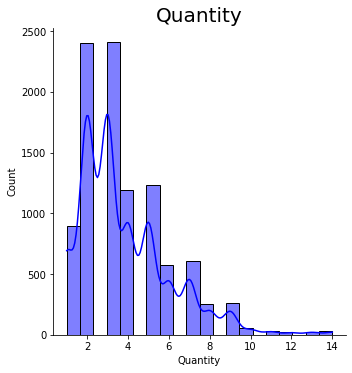

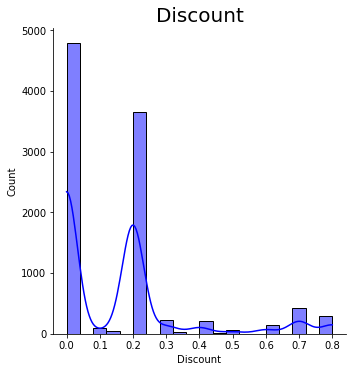

In [16]:
catigorical_feature = ['Ship Mode', 'Segment', 'Region','Category', 'Sub-Category','Quantity']
numerical_feature = ['Sales','Quantity','Discount']

for feature in numerical_feature :
    sns.displot(data[feature], kde=True, bins=20, color="b")
    plt.title(feature,fontsize=20)

In [10]:
data.drop('Postal Code',inplace=True,axis=1)
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


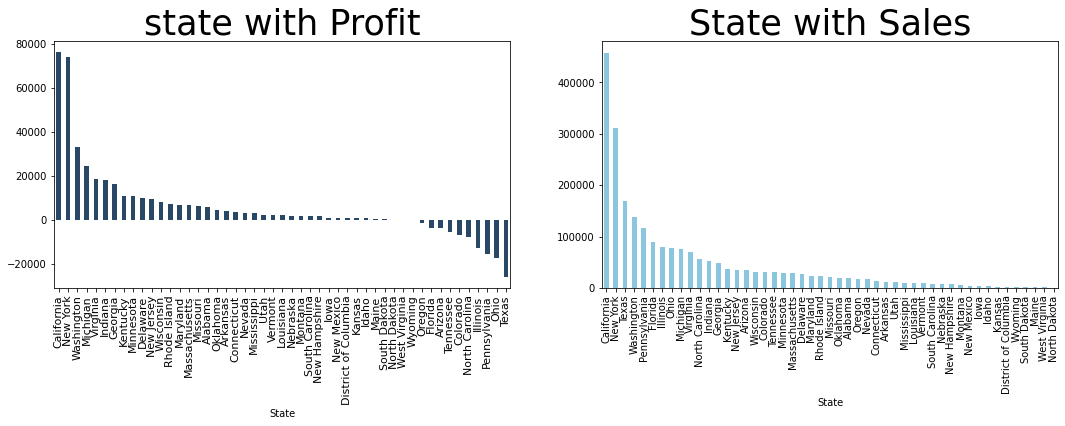

In [11]:
plt.figure(figsize = (18,10))
plt.subplot(2,2,1)
state=data.groupby(['State'])['Profit'].sum()
state.sort_values(ascending=False,inplace=True)
plt.title('state with Profit',fontsize=35)
state.plot.bar(color='#294866')
plt.xticks(rotation=90,fontsize=11)


plt.subplot(2,2,2)
state=data.groupby(['State'])['Sales'].sum()
state.sort_values(ascending=False,inplace=True)
plt.title('State with Sales',fontsize=35)
state.plot.bar(color = '#8BC6DF')
plt.xticks(rotation=90,fontsize=10)
plt.show()

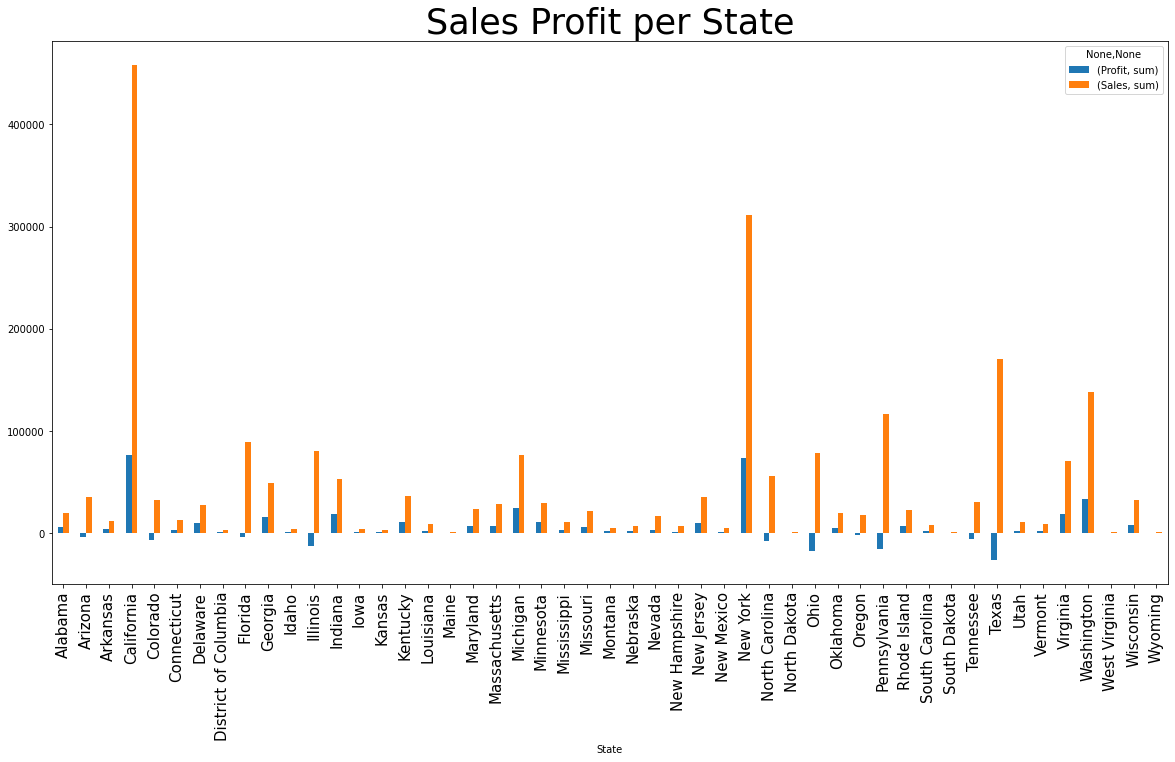

In [15]:
sales_profit=data.groupby(['State'])['Profit','Sales'].agg(['sum'])
sales_profit.plot.bar(figsize=(20,10))
plt.title('Sales Profit per State',fontsize=35)
plt.xticks(rotation=90,fontsize=15)
plt.show(block=True)

- calfornia and New yourk are the top there some places with very high sales and profit.
- It is not a condition that an increase in sales means an increase in profit like Texas and Ohio

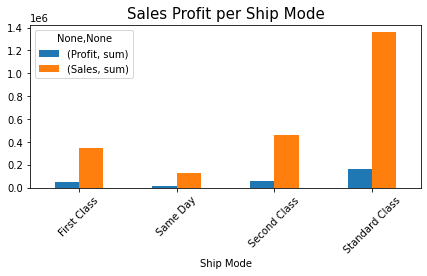

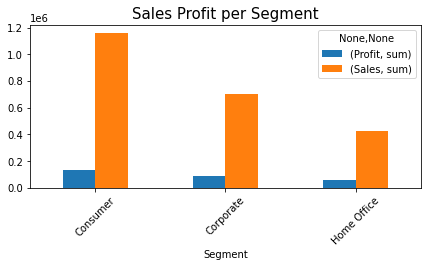

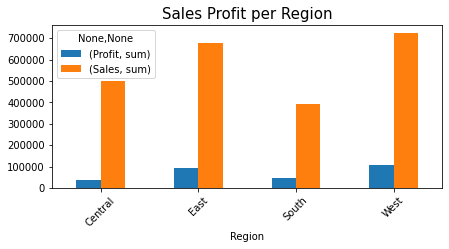

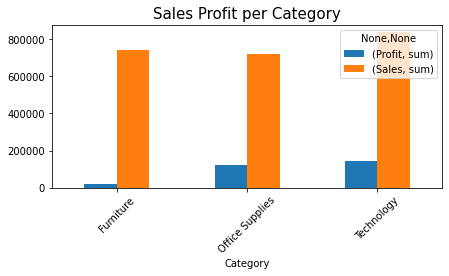

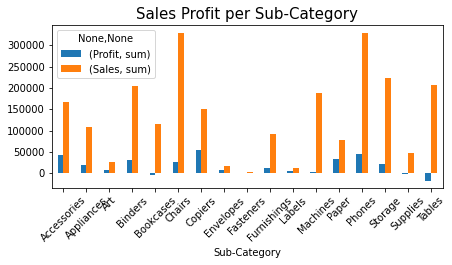

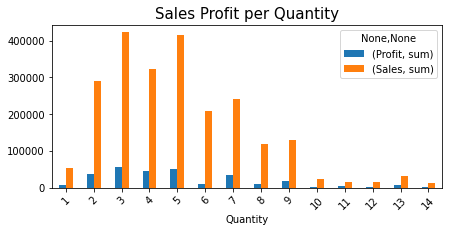

In [17]:
for feature in catigorical_feature:
    sales_profit=data.groupby([feature])['Profit','Sales'].agg(['sum'])
    sales_profit.plot.bar(rot=45,figsize=(7,3))
    plt.title('Sales Profit per {}'.format(feature),fontsize=15)
    plt.show()

- Stander Class of Ship Mode is a highest profit and sales
- Technology has the highest sales among other categories
- West region has the highest profit and Sales

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

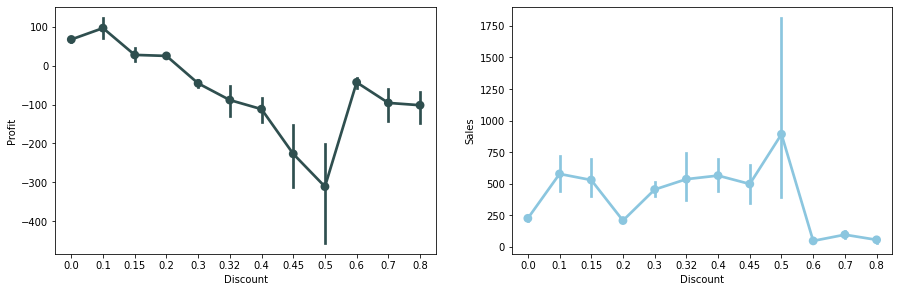

In [18]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.pointplot(x='Discount',y='Profit',data=data,color='#2F4F4F')
plt.subplot(2,2,2)
sns.pointplot(x='Discount',y='Sales',data=data,color='#8BC6DF')

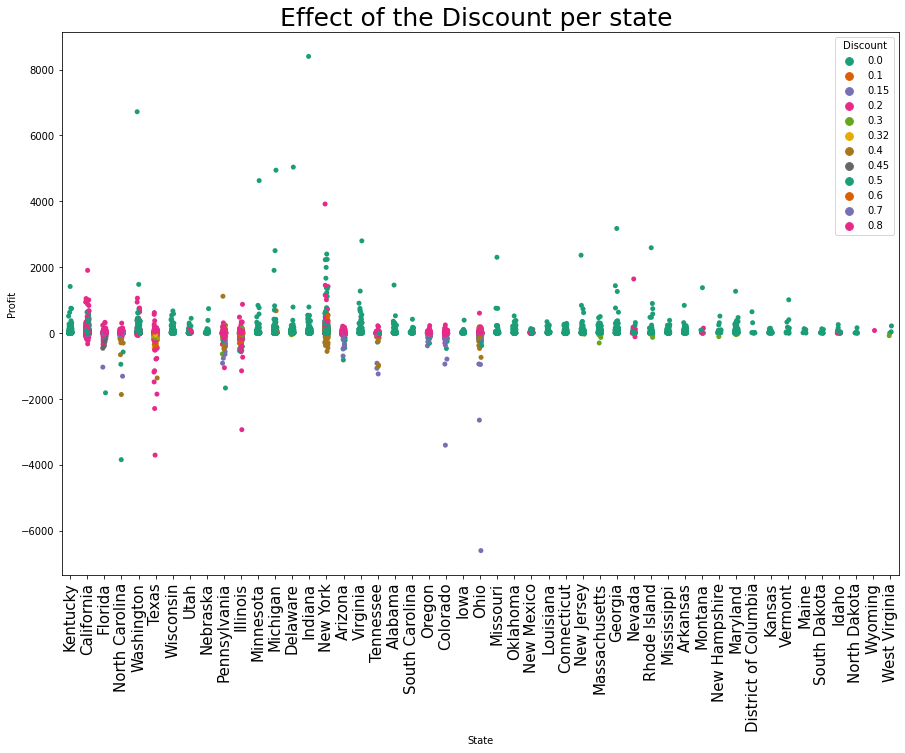

In [23]:
plt.figure(figsize=(15,10))
sns.stripplot(x='State',y='Profit',hue='Discount',data=data,palette='Dark2')

plt.title('Effect of the Discount per state ',fontsize=25)
plt.xticks(rotation=90,fontsize=15)

plt.show()

- When the discount increase It has a negative effect on profits like Texas and Ohio

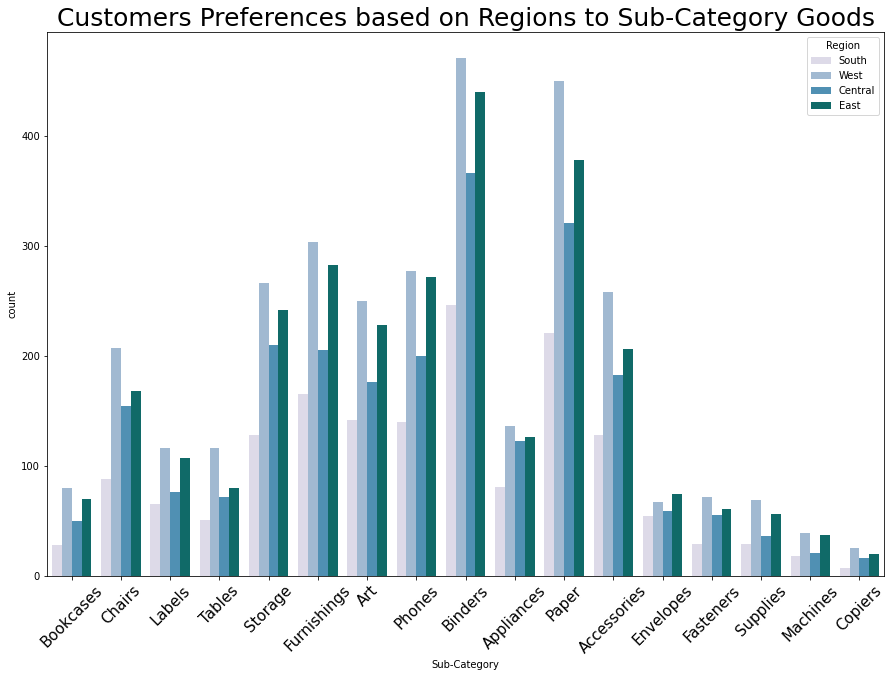

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(x='Sub-Category',hue='Region',data=data,palette='PuBuGn')

plt.title('Customers Preferences based on Regions to Sub-Category Goods',fontsize=25)
plt.xticks(rotation=45,fontsize=15)

plt.show()

- The customer from western region is the most common who prefer certain goods over other regions

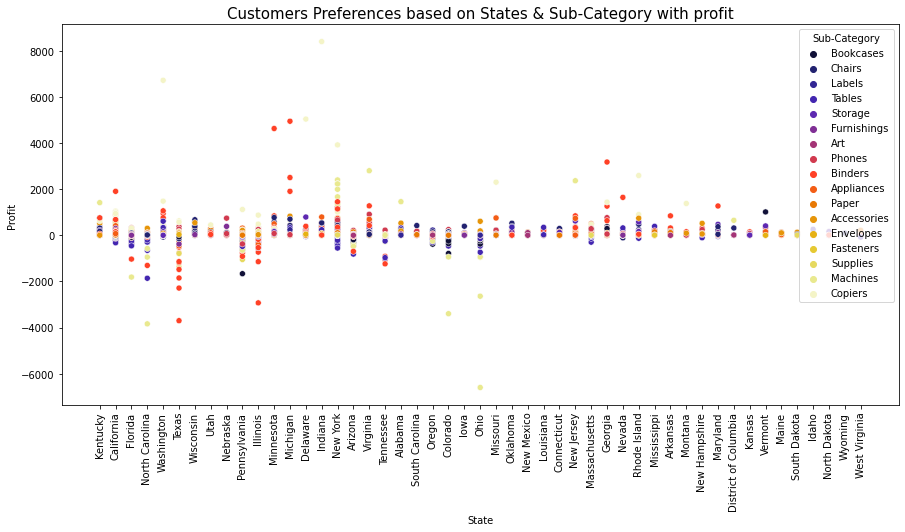

In [26]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='State',y='Profit',hue='Sub-Category',data=data,palette='CMRmap')
plt.title('Customers Preferences based on States & Sub-Category with profit',fontsize=15)
plt.xticks(rotation=90,fontsize=10)

plt.show()

Some products are not sold so much in some states but are sold in other states very well, so we can exchange the products between the states like :
- Copiers doesn't sold very much in Ohio and Colorado but the opposite in Indiana and New York

 <b> Conclusion : <b>
- Technology has the highest sales and profit among other categories
- It is not a condition that an increase in sales means an increase in profit like Texas and Ohio
- State with the highest amount of sales is California followed by New York, Texas, and so on
- Copier has maximum amount of profit and chair has the maximum amount of sales
- Customer from West Region is the most common to have preference to particular goods than other regions
- Stander Class of Ship Mode is a highest profit and sales
- When the discount increase It has a negative effect on profits like Texas and Ohio
- West region has the highest profit and Sales
- Some products are not sold so much in some states but are sold in other states very well, so we can exchange the products between the states like Copiers doesn't sold very much in Ohio and Colorado but the opposite in Indiana and New York